In [3]:

import numpy as np
from  Reson_Sim.Resonator import Resonator as rs

rs1 = rs(Temp=np.arange(0,11,1))

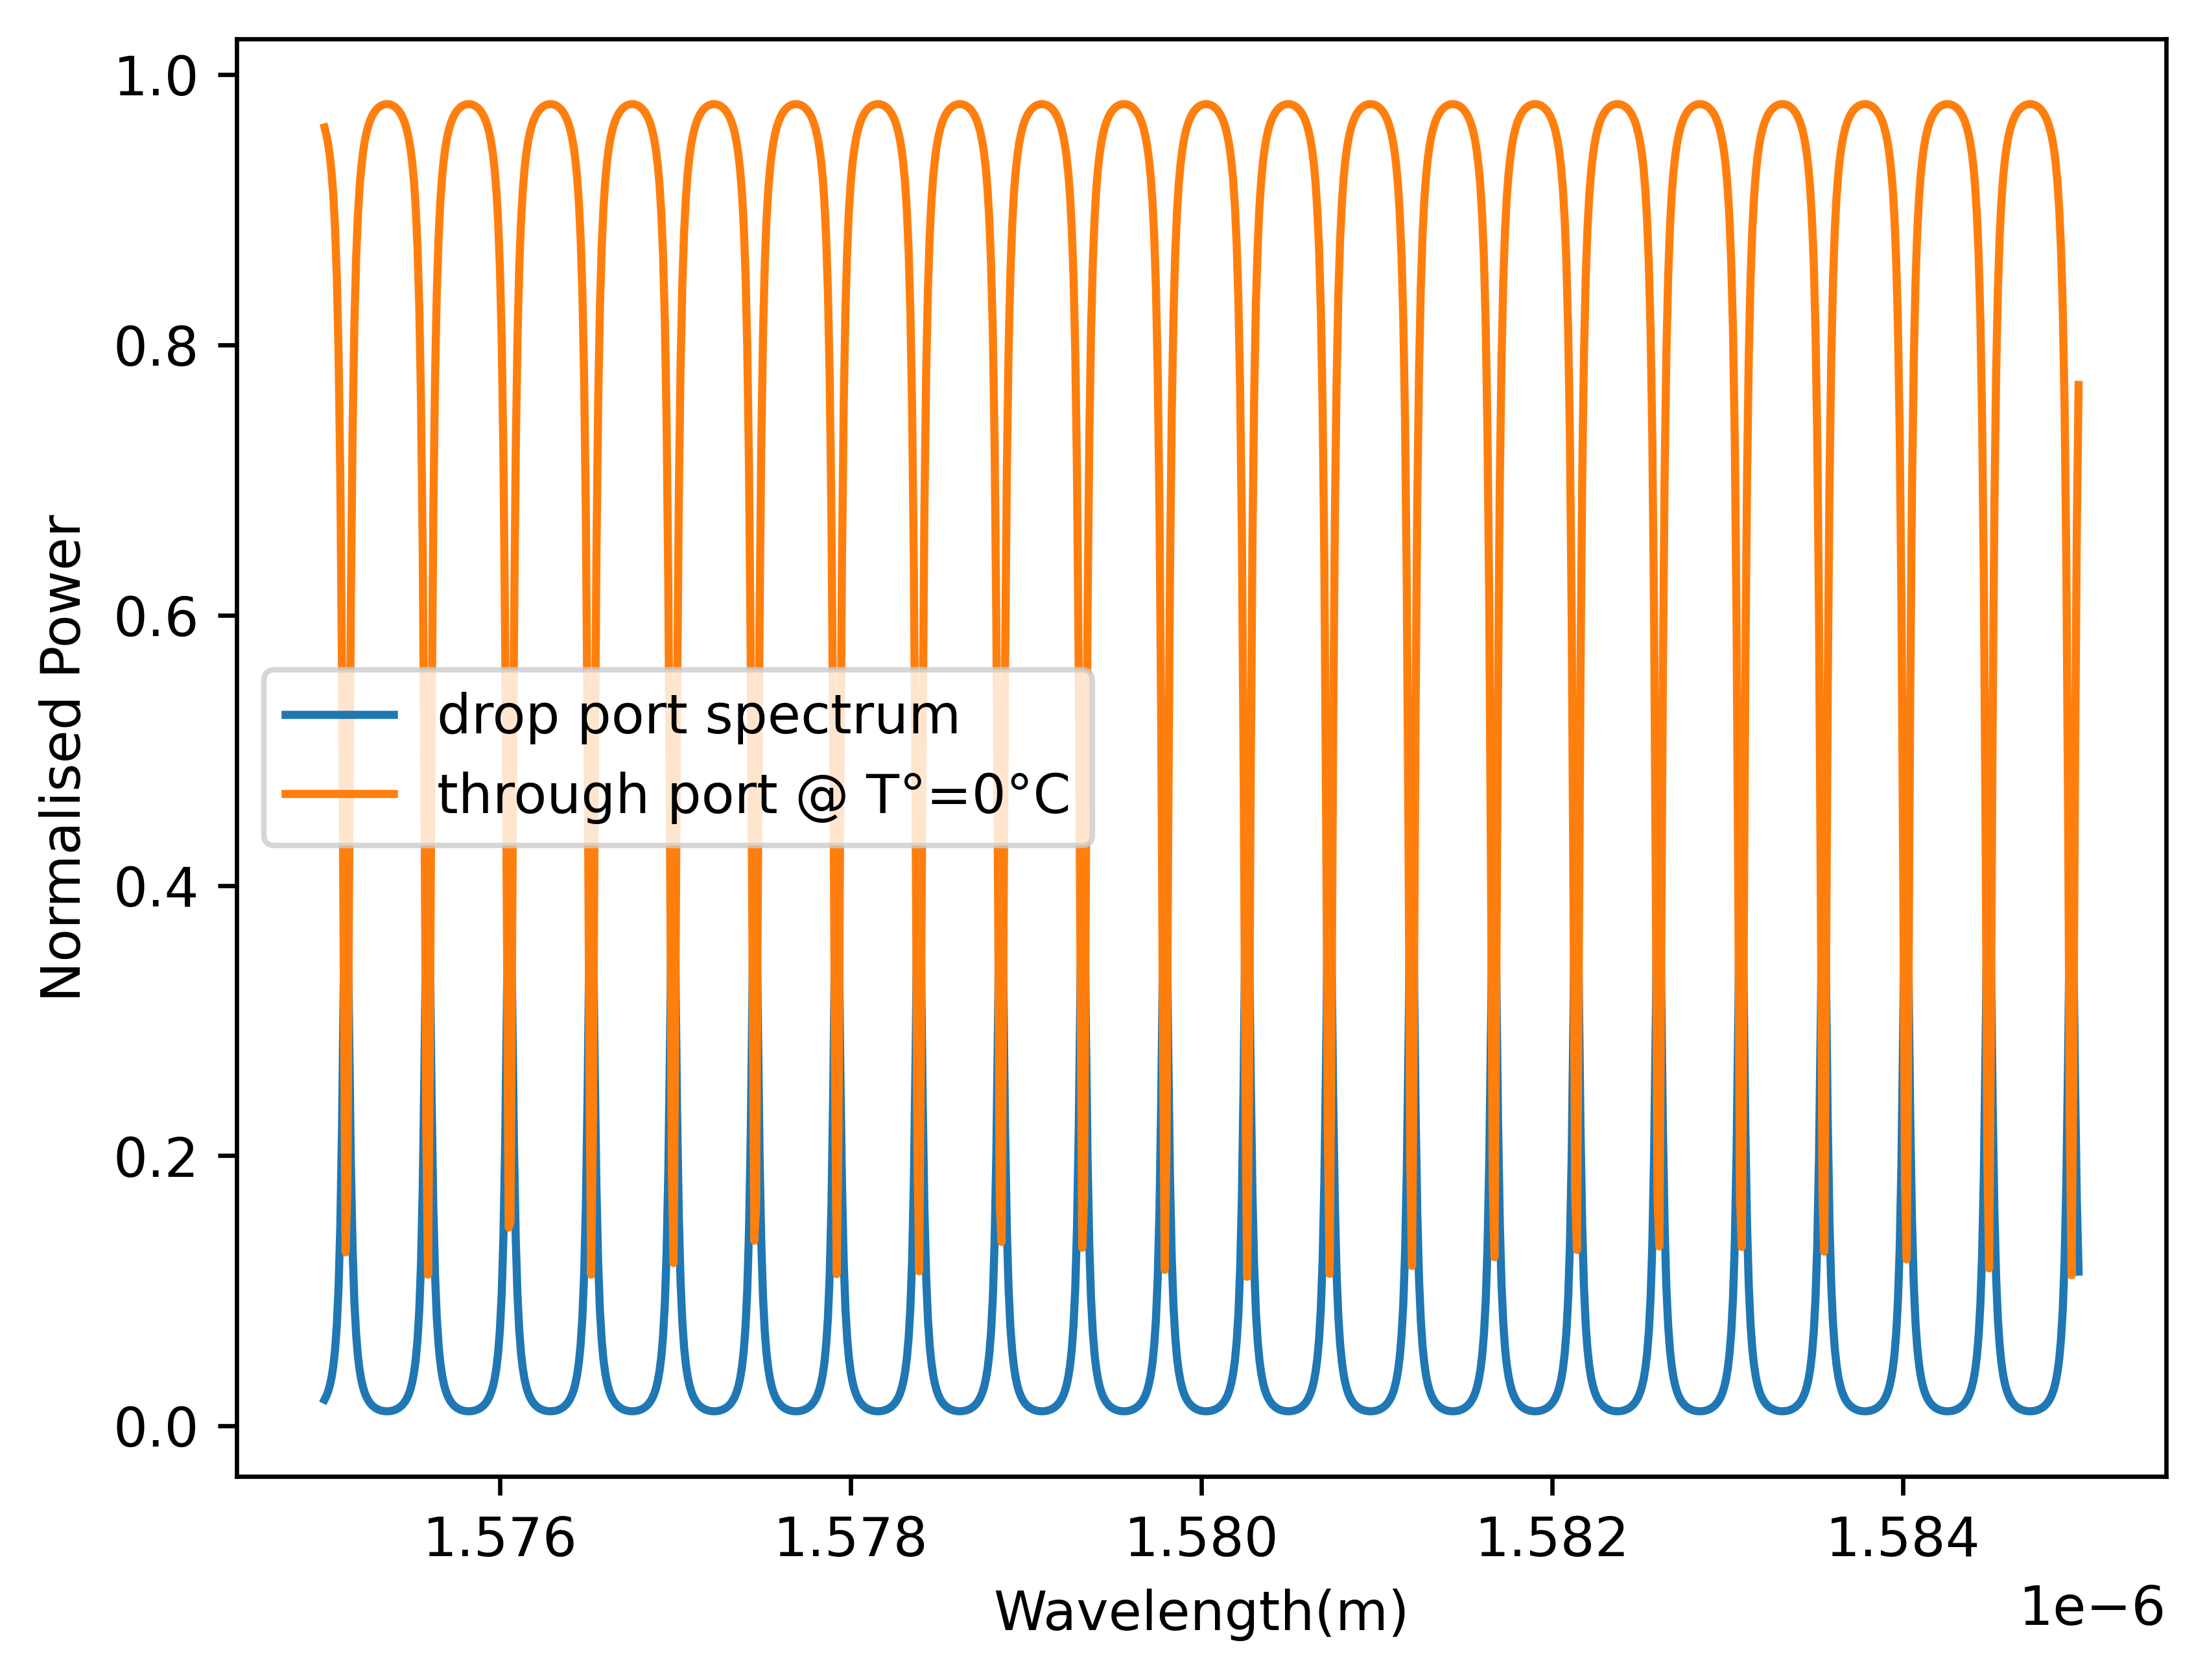

In [4]:
rs1.display_spectrum(range(0,1))